In [327]:
# Sources:
# Food and Agriculture Organisation of the United Nations
# https://europe-west1-fao-empresi.cloudfunctions.net/getDiseaseEvents?disease_name=african_swine_fever&animal_type=all&diagnosis_status=confirmed&end_date=2025-08-07&start_date=2000-05-07
# Alternative source for latest pork prices: https://ahdb.org.uk/pork/eu-deadweight-pig-prices
# Pig types: https://ec.europa.eu/eurostat/data/database ; Pig types by utilised agricultural area, size classes of livestock and NUTS 2 region (ef_lsk_pigs)
# Better pigs data (annual) https://ec.europa.eu/eurostat/databrowser/view/apro_mt_lspig/default/table?lang=en

import pandas as pd
import matplotlib.pyplot as plt


# Define the path to your CSV file
# Make sure to replace 'your_file.csv' with the actual path to your file.
file_path = 'getDiseaseEvents.csv'

In [328]:
df = pd.read_csv(file_path) 
df['observation_date'] = pd.to_datetime(df['observation_date'], errors='coerce')
df['report_date'] = pd.to_datetime(df['report_date'], errors='coerce')

In [329]:
df.head()

,id_event,disease,serotype,latitude,longitude,locality,country,region,observation_date,report_date,species,diagnosis_source,humans_affected,humans_deaths,diagnosis_status
0,237727,African swine fever,NaN,47.725441,22.769389,Cehal,Romania,Europe,2018-06-21 00:00:00+00:00,2018-06-28 00:00:00+00:00,"Wild,Wild boar (Sus scrofa) (Suidae),",WOAH (former OIE),NaN,NaN,Confirmed
1,237521,African swine fever,NaN,45.052236,28.897984,Pardina,Romania,Europe,2018-06-16 00:00:00+00:00,2018-06-26 00:00:00+00:00,"Domestic,Swine,",WOAH (former OIE),NaN,NaN,Confirmed
2,207423,African swine fever,NaN,56.492800,25.107748,Aizkraukles,Latvia,Europe,2015-09-02 00:00:00+00:00,2015-09-14 00:00:00+00:00,"Wild,Wild boar (Sus scrofa) (Suidae),",WOAH (former OIE),NaN,NaN,Confirmed
3,181518,African swine fever,NaN,52.829694,42.009440,"Tatarshino, Rasskazovsky",Russian Federation,Europe,2013-08-25 00:00:00+00:00,2013-10-16 00:00:00+00:00,"Domestic,swine,",WOAH (former OIE),NaN,NaN,Confirmed
4,237731,African swine fever,NaN,47.725441,22.769389,SUPUR,Romania,Europe,2018-06-22 00:00:00+00:00,2018-06-28 00:00:00+00:00,"Wild,Wild boar (Sus scrofa) (Suidae),",WOAH (former OIE),NaN,NaN,Confirmed


In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61572 entries, 0 to 61571
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id_event          61572 non-null  int64              
 1   disease           61572 non-null  object             
 2   serotype          0 non-null      float64            
 3   latitude          61572 non-null  float64            
 4   longitude         61572 non-null  float64            
 5   locality          61572 non-null  object             
 6   country           61572 non-null  object             
 7   region            61572 non-null  object             
 8   observation_date  59002 non-null  datetime64[ns, UTC]
 9   report_date       61572 non-null  datetime64[ns, UTC]
 10  species           61572 non-null  object             
 11  diagnosis_source  61572 non-null  object             
 12  humans_affected   4 non-null      float64            
 13  h

In [332]:
df['region'].value_counts()

# Europe has by far the most recorded cases

region
Europe      52095
Asia         8517
Africa        618
Americas      333
Oceania         9
Name: count, dtype: int64

In [333]:
df['country'].value_counts()

country
Poland                       18604
Romania                       8703
Latvia                        4703
Hungary                       4242
Germany                       3189
                             ...  
Benin                            1
Mali                             1
Dem People's Rep of Korea        1
Togo                             1
Sierra Leone                     1
Name: count, Length: 74, dtype: int64

In [334]:
df_europe = df[df['region'] == 'Europe']
df_europe['report_year_month'] = df_europe['report_date'].dt.to_period('M')
grouped_counts = df_europe.groupby(['report_year_month', 'country']).size()

C:\Users\Dom\AppData\Local\Temp\ipykernel_21308\3471447304.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_europe['report_year_month'] = df_europe['report_date'].dt.to_period('M')
C:\Users\Dom\AppData\Local\Temp\ipykernel_21308\3471447304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_europe['report_year_month'] = df_europe['report_date'].dt.to_period('M')


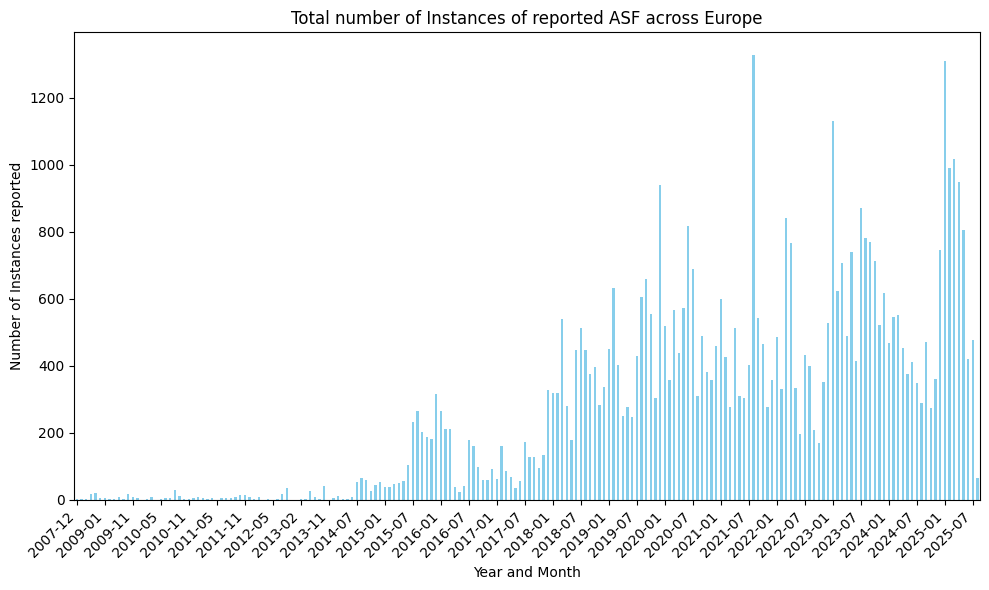

In [350]:
year_month_counts = df_europe['report_year_month'].value_counts().sort_index()

all_labels = year_month_counts.index.tolist()
tick_locations = range(0, len(all_labels), 6)
tick_labels = all_labels[::6]

plt.figure(figsize=(10, 6))
year_month_counts.plot(kind='bar', color='skyblue')
plt.title('Total number of Instances of reported ASF across Europe')
plt.xlabel('Year and Month')
plt.ylabel('Number of Instances reported')
plt.xticks(ticks=tick_locations, labels=tick_labels, rotation=45, ha='right')
plt.tight_layout()

<Figure size 1200x700 with 0 Axes>

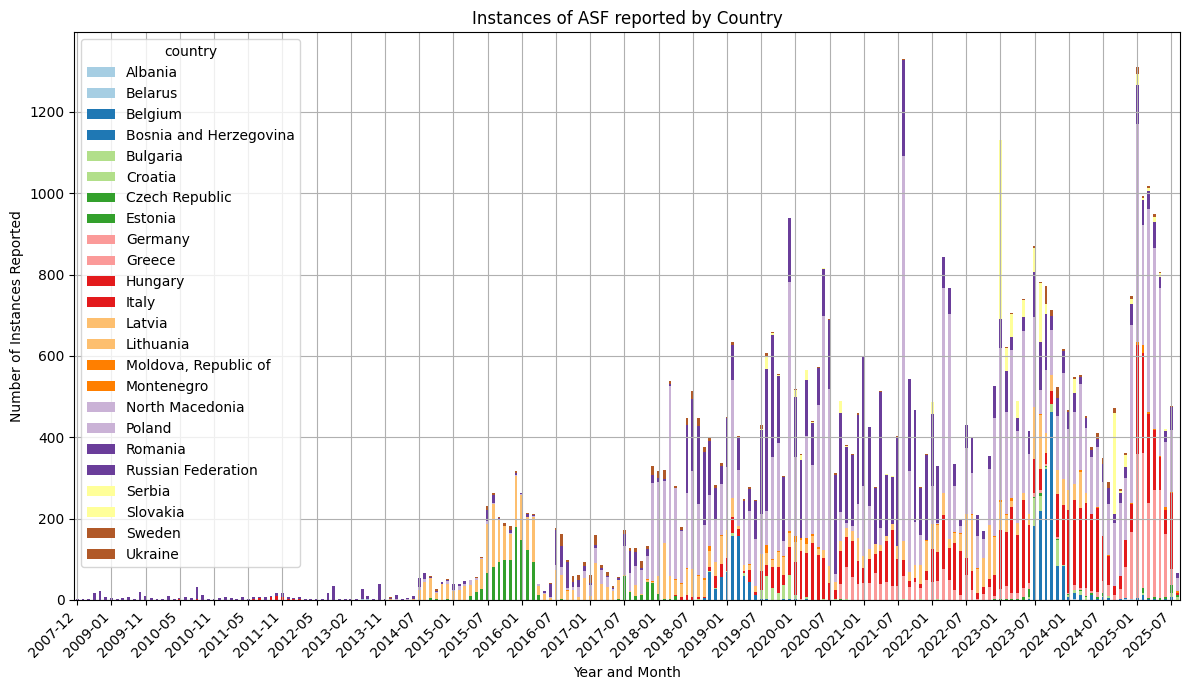

In [336]:
stacked_data = grouped_counts.unstack(fill_value=0)

all_labels = stacked_data.index.tolist()
tick_locations = range(0, len(all_labels), 6)
tick_labels = all_labels[::6]

# 4. Plot the stacked bar chart
plt.figure(figsize=(12, 7))
stacked_data.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Paired')

# Set the title and labels
plt.title('Instances of ASF reported by Country')
plt.xlabel('Year and Month')
plt.ylabel('Number of Instances Reported')

# Make the x-axis labels readable by showing a subset (this is important for larger datasets)
# In this small example, we will just rotate the labels
plt.xticks(ticks=tick_locations, labels=tick_labels, rotation=45, ha='right')
plt.grid()
plt.savefig("plots/asf_instances_by_country.svg")

# Adjust the plot layout
plt.tight_layout()

In [337]:
# Why not look at the difference in time between reported and observed? Because this is just when it was reported -> there is a lag compared to reported

# Check how the dates match between here and when the ban came in from China on Germany

In [340]:
# 1.Italy, ban was announced January 26th of September

italy_df = df[df['country'] == 'Italy']
italy_min_date_index = italy_df['report_date'].idxmin()
df.loc[italy_min_date_index]

# On January 26th, 2022, the China Ministry of Agriculture announced a suspension of

italy_df_post_2012 = italy_df[italy_df['report_date'].dt.to_period('Y') > '2012']
italy_post_2012_min_date_index = italy_df_post_2012['report_date'].idxmin()
df.loc[italy_post_2012_min_date_index]

C:\Users\Dom\AppData\Local\Temp\ipykernel_21308\1069009165.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  italy_df_post_2012 = italy_df[italy_df['report_date'].dt.to_period('Y') > '2012']


id_event                                        310616
disease                            African swine fever
serotype                                           NaN
latitude                                       44.6201
longitude                                       8.6437
locality                                         Ovada
country                                          Italy
region                                          Europe
observation_date             2022-01-05 00:00:00+00:00
report_date                  2022-01-05 00:00:00+00:00
species             Wild,Wild boar:Sus scrofa(Suidae),
diagnosis_source                  National authorities
humans_affected                                    NaN
humans_deaths                                      NaN
diagnosis_status                             Confirmed
Name: 14870, dtype: object

In [338]:
# 2. Filter the DataFrame to only include rows for 'Germany'
germany_df = df[df['country'] == 'Germany']
min_date_index = germany_df['report_date'].idxmin()
df.loc[min_date_index]

# earliest news article I can find is September 14th 2020

id_event                                           278058
disease                               African swine fever
serotype                                              NaN
latitude                                            52.02
longitude                                           14.63
locality                Spree-Neiße-Kreis, Schenkendöbern
country                                           Germany
region                                             Europe
observation_date                2020-09-07 00:00:00+00:00
report_date                     2020-09-09 00:00:00+00:00
species             Wild,Wild boar (Sus scrofa) (Suidae),
diagnosis_source       International reference laboratory
humans_affected                                       NaN
humans_deaths                                         NaN
diagnosis_status                                Confirmed
Name: 5151, dtype: object

In [89]:
k = df[df['country'] == 'Italy']

In [90]:
k['report_year_month'] = k['report_date'].dt.to_period('M')
year_month_counts = k['report_year_month'].value_counts().sort_index()

C:\Users\Dom\AppData\Local\Temp\ipykernel_21308\1086066146.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  k['report_year_month'] = k['report_date'].dt.to_period('M')
C:\Users\Dom\AppData\Local\Temp\ipykernel_21308\1086066146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k['report_year_month'] = k['report_date'].dt.to_period('M')


C:\Users\Dom\AppData\Local\Temp\ipykernel_21308\96021571.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['report_date'] = pd.to_datetime(df['observation_date'])
C:\Users\Dom\AppData\Local\Temp\ipykernel_21308\96021571.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_month'] = df['report_date'].dt.strftime('%Y-%m')


<Figure size 1200x700 with 0 Axes>

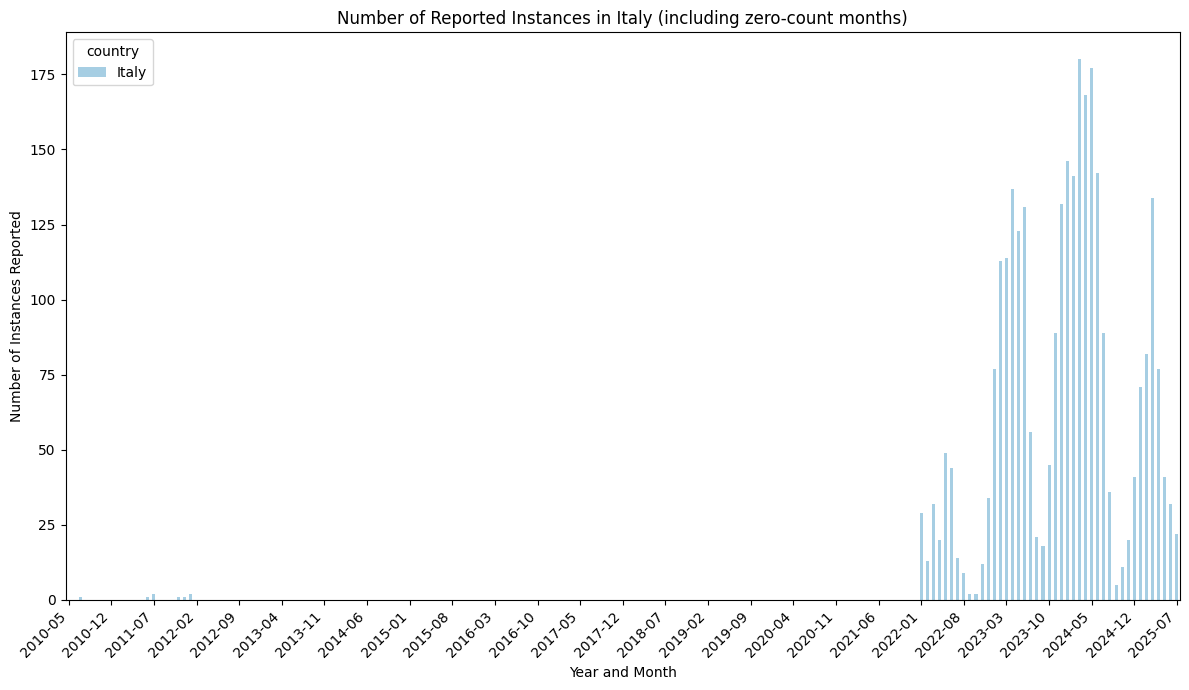

In [345]:
def plot_reports_in_country(dataframe, country_name):
    df = dataframe[dataframe['country'] == country_name]
    
    # Convert 'observation_date' to datetime objects and create 'year_month'
    df['report_date'] = pd.to_datetime(df['observation_date'])
    df['year_month'] = df['report_date'].dt.strftime('%Y-%m')
    
    # Group the data and unstack it as before
    grouped_counts = df.groupby(['year_month', 'country']).size()
    stacked_data = grouped_counts.unstack(fill_value=0)
    
    # --- This is the new part to fill in the missing months! ---
    
    # 1. Find the full date range from the start to the end of the data
    all_months = pd.date_range(
        start=df['observation_date'].min(),
        end=df['observation_date'].max(),
        freq='MS' # 'MS' stands for Month Start
    ).strftime('%Y-%m')
    
    # 2. Reindex the stacked data to include all months
    stacked_data = stacked_data.reindex(all_months, fill_value=0)
        
    # Plot the reindexed data
    plt.figure(figsize=(12, 7))
    ax = stacked_data.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Paired')

    # Ajdust number of X labels
    all_labels = stacked_data.index
    num_labels_to_show = 25
    step = max(1, len(all_labels) // num_labels_to_show)
    visible_ticks = np.arange(0, len(all_labels), step)
    visible_labels = all_labels[::step]
    ax.set_xticks(visible_ticks)
    ax.set_xticklabels(visible_labels)    
    
    # Set the title and labels
    plt.title(f'Number of Reported Instances in {country_name} (including zero-count months)')
    plt.xlabel('Year and Month')
    plt.ylabel('Number of Instances Reported')
    
    # Make the x-axis labels readable
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig("plots/asf_instances_in_italy.svg")

plot_reports_in_country(df, "Italy")

In [152]:
carcass_file = 'class_E_pigmeat_carcasses.csv'
carcass_prices = pd.read_csv(carcass_file)
carcass_prices['year_month_dt'] = pd.to_datetime(carcass_prices['Class E'], format='%Y %b')
carcass_prices['year_month'] = carcass_prices['year_month_dt'].dt.to_period('M')

carcass_prices = carcass_prices.rename(columns={'EU\n(weight.\navg.)': "EU Average"})
#carcass_prices['EU\n(weight.\navg.)	'] = pd.to_datetime(carcass_prices['Class E'], format='%Y %b')

In [153]:
carcass_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Class E        97 non-null     object        
 1   Belgium        97 non-null     float64       
 2   Bulgaria       97 non-null     float64       
 3   Czechia        97 non-null     float64       
 4   Denmark        97 non-null     float64       
 5   Germany        97 non-null     float64       
 6   Estonia        95 non-null     float64       
 7   Ireland        97 non-null     float64       
 8   Greece         97 non-null     float64       
 9   Spain          97 non-null     float64       
 10  France         97 non-null     float64       
 11  Croatia        97 non-null     float64       
 12  Italy          33 non-null     float64       
 13  Cyprus         97 non-null     float64       
 14  Latvia         97 non-null     float64       
 15  Lihtuania      97 non-nul

In [154]:
df_eu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52095 entries, 0 to 61568
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   id_event           52095 non-null  int64              
 1   disease            52095 non-null  object             
 2   serotype           0 non-null      float64            
 3   latitude           52095 non-null  float64            
 4   longitude          52095 non-null  float64            
 5   locality           52095 non-null  object             
 6   country            52095 non-null  object             
 7   region             52095 non-null  object             
 8   observation_date   51699 non-null  datetime64[ns, UTC]
 9   report_date        52095 non-null  datetime64[ns, UTC]
 10  species            52095 non-null  object             
 11  diagnosis_source   52095 non-null  object             
 12  humans_affected    0 non-null      float64         

Combined bar and line chart saved as combined_bar_line_chart.png


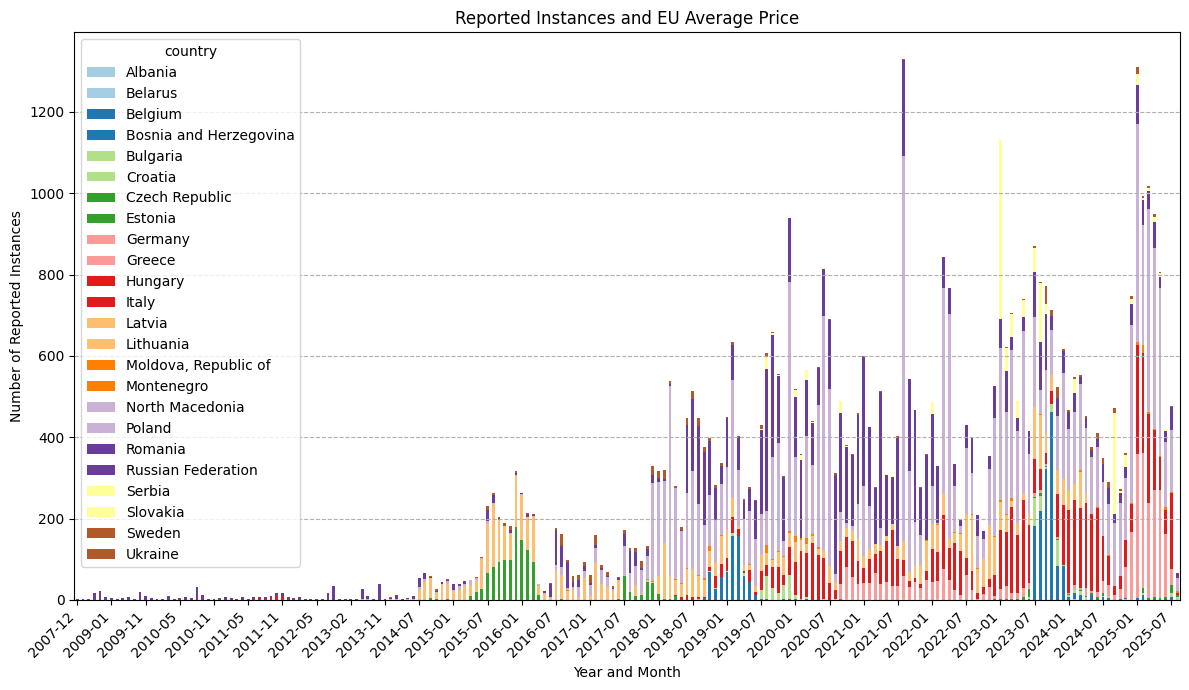

In [169]:
import numpy as np

df_eu = df_europe.copy()
df_eu['year_month'] = df_eu['report_year_month']

merged_df = pd.merge(df_eu, carcass_prices[['year_month', 'EU Average']], on='year_month', how='left')

grouped_counts = merged_df.groupby(['year_month', 'country']).size()
stacked_data = grouped_counts.unstack(fill_value=0)

all_labels = stacked_data.index.tolist()
tick_locations = range(0, len(all_labels), 6)
tick_labels = all_labels[::6]

# 1. Create a figure and a primary axes object
fig, ax1 = plt.subplots(figsize=(12, 7))

# 2. Plot the stacked bar chart on the primary axes (ax1)
stacked_data.plot(kind='bar', stacked=True, ax=ax1, colormap='Paired')
ax1.set_title('Reported Instances and EU Average Price')
ax1.set_xlabel('Year and Month')
ax1.set_ylabel('Number of Reported Instances')
ax1.set_ylim(0) # Start y-axis at 0

# Adjust x-axis labels to be readable
all_labels = stacked_data.index.tolist()
tick_locations = range(0, len(all_labels), 6)
tick_labels = all_labels[::6]
ax1.set_xticks(tick_locations)
ax1.set_xticklabels(tick_labels, rotation=45, ha='right')
ax1.grid(True, linestyle='--', axis='y')

# # Adjust the plot layout
plt.tight_layout()
# plt.savefig('combined_bar_line_chart.png')
print("Combined bar and line chart saved as combined_bar_line_chart.png")

In [142]:
stacked_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 194 entries, 2007-12 to 2025-08
Freq: M
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Albania                 194 non-null    int64
 1   Belarus                 194 non-null    int64
 2   Belgium                 194 non-null    int64
 3   Bosnia and Herzegovina  194 non-null    int64
 4   Bulgaria                194 non-null    int64
 5   Croatia                 194 non-null    int64
 6   Czech Republic          194 non-null    int64
 7   Estonia                 194 non-null    int64
 8   Germany                 194 non-null    int64
 9   Greece                  194 non-null    int64
 10  Hungary                 194 non-null    int64
 11  Italy                   194 non-null    int64
 12  Latvia                  194 non-null    int64
 13  Lithuania               194 non-null    int64
 14  Moldova, Republic of    194 non-null    int64
 15  Mont

In [175]:
eu_price_title = 'EU Pig Carcase Grade E EURO/100kg'

In [348]:
def plot_price_over_time(country_names):
    """
    Plots the price over time for one or more countries.
    
    Args:
        country_names (list): A list of country names (strings) to plot.
    """
    # Create a new figure and axes for the plot
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # Define a list of colors to use for the plots
    colors = ['darkorange', 'purple', 'green']
    
    # Loop through the list of countries and plot each one
    for i, country_name in enumerate(country_names):
        # Plot the column for the current country
        carcass_prices_for_plot[country_name].plot(
            ax=ax,
            kind='line',
            # color=colors[i],  # Use a different color for each line
            linewidth=2,
            marker='o',
            label=country_name # Add a label for the legend
        )
    
    # Set the title and labels
    ax.set_title('Price in Various Countries')
    ax.set_xlabel('Year and Month')
    ax.set_ylabel(eu_price_title)
    ax.grid(True, linestyle='--', axis='y')
    ax.set_ylim(bottom=0)
    
    # Add a legend to the plot
    ax.legend()
    
    plt.tight_layout()
    plt.savefig("plots/pork_price_in_european_countries.svg")


In [352]:
stacked_data_post_2016 

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 194 entries, 2007-12 to 2025-08
Freq: M
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Albania                 194 non-null    int64
 1   Belarus                 194 non-null    int64
 2   Belgium                 194 non-null    int64
 3   Bosnia and Herzegovina  194 non-null    int64
 4   Bulgaria                194 non-null    int64
 5   Croatia                 194 non-null    int64
 6   Czech Republic          194 non-null    int64
 7   Estonia                 194 non-null    int64
 8   Germany                 194 non-null    int64
 9   Greece                  194 non-null    int64
 10  Hungary                 194 non-null    int64
 11  Italy                   194 non-null    int64
 12  Latvia                  194 non-null    int64
 13  Lithuania               194 non-null    int64
 14  Moldova, Republic of    194 non-null    int64
 15  Mont

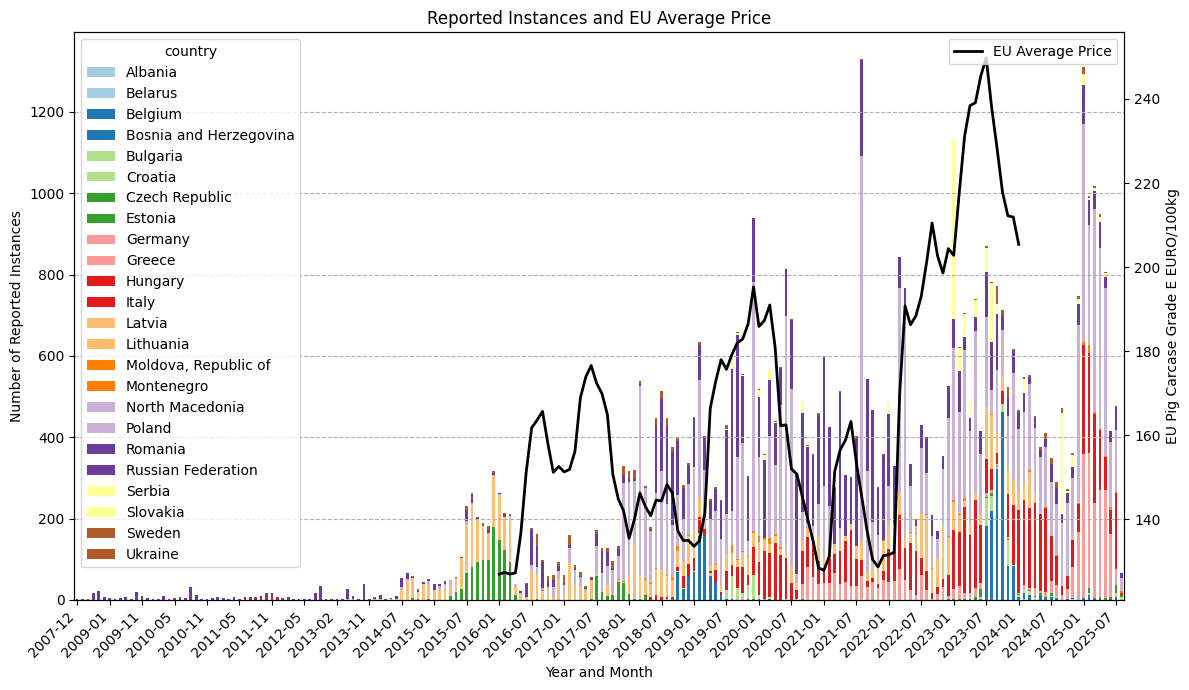

In [357]:
import matplotlib.pyplot as plt

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot the stacked bar chart on ax1
stacked_data.plot(kind='bar', stacked=True, ax=ax1, colormap='Paired')
ax1.set_title('Reported Instances and EU Average Price')
ax1.set_xlabel('Year and Month')
ax1.set_ylabel('Number of Reported Instances')
ax1.set_ylim(0)

# X-axis formatting
tick_locations = range(0, len(stacked_data.index), 6)
tick_labels = stacked_data.index[tick_locations]
ax1.set_xticks(tick_locations)
ax1.set_xticklabels(tick_labels, rotation=45, ha='right')
ax1.grid(True, linestyle='--', axis='y')

# --- Add the EU Average line plot on secondary y-axis (ax2) ---
ax2 = ax1.twinx()  # Create secondary y-axis

# Ensure the EU average matches the x-axis length
eu_avg_values = merged_df.groupby('year_month')['EU Average'].first().reindex(stacked_data.index)

# Plot the EU average line
ax2.plot(range(len(eu_avg_values)), eu_avg_values, color='black', linewidth=2, label='EU Average Price')
ax2.set_ylabel(eu_price_title)
ax2.legend(loc='upper right')

# Final layout tweaks
plt.tight_layout()
plt.savefig('plots/combined_price_and_asf_cases.svg')
plt.show()


# Cause for spike in 2023 -> smaller herds in 2022 following spiralling costs (related in part to Ukraine war)

In [179]:
# look specifically at given countries

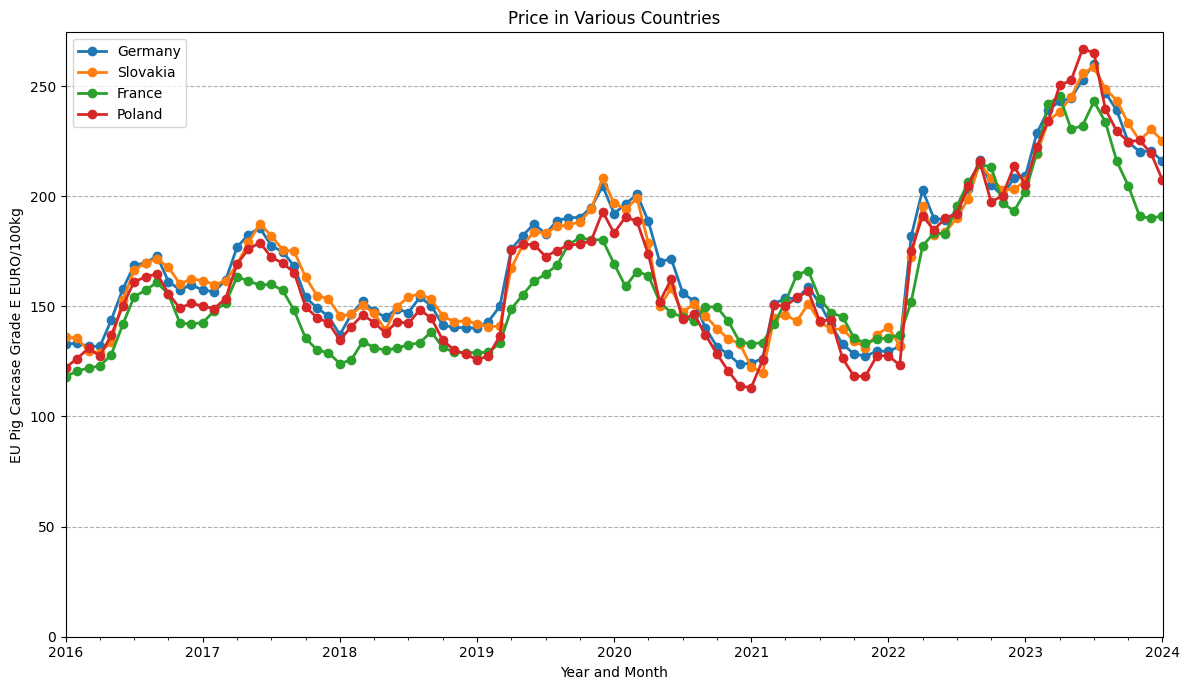

In [349]:
plot_price_over_time(["Germany", "Slovakia", "France", "Poland"])

What to do to further iron out this data exploration?
- Look at the delay between observed and reported -> median time for Europe -> gives a good idea of time lag.
- Provide assumptions -> correlation with price -> show that it is not very reflective -> likely other explanations
- Next question would be, do herd sizes the following year in Europe relate to the incidence of 



In [198]:
## Exploration into data from Asia
# Why? 30th Dec, China bans pork imports from Indonesia

df_asia = df[df['region'] == 'Asia']
df_asia['country'].value_counts()

df_vietnam = df_asia[df_asia['country'] == 'Viet Nam']

C:\Users\Dom\AppData\Local\Temp\ipykernel_21308\1828666220.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['report_date'] = pd.to_datetime(df['observation_date'])
C:\Users\Dom\AppData\Local\Temp\ipykernel_21308\1828666220.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_month'] = df['report_date'].dt.strftime('%Y-%m')


<Figure size 1200x700 with 0 Axes>

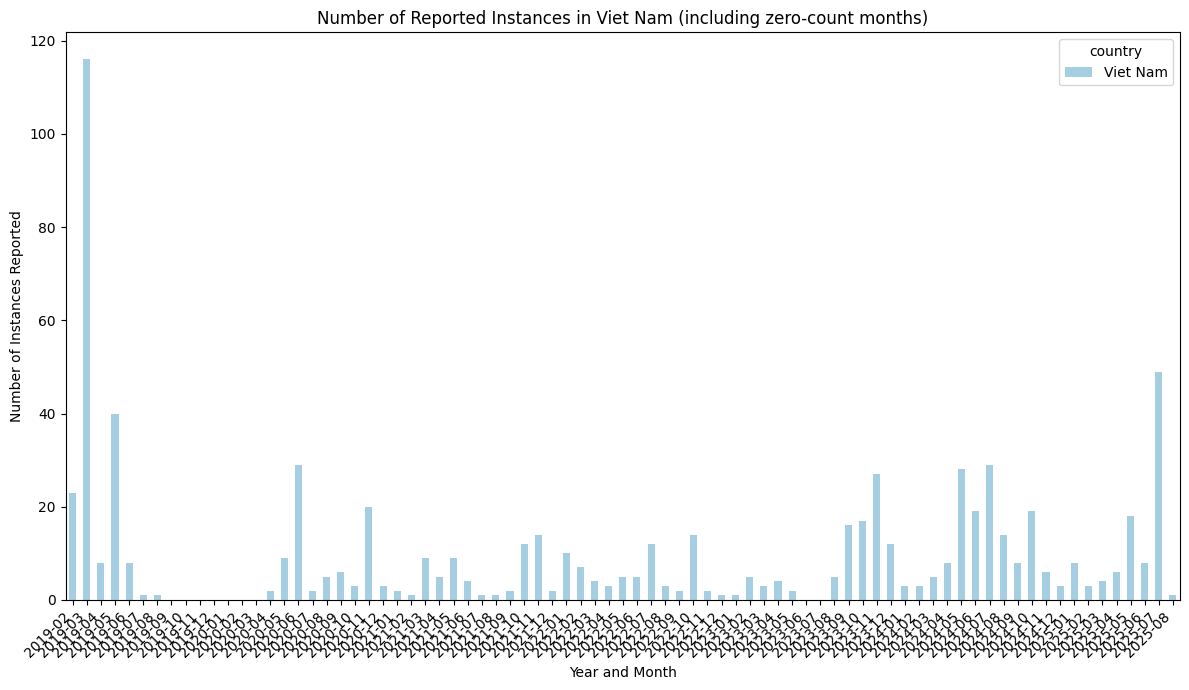

In [205]:
plot_reports_in_country(df_asia, 'Viet Nam')
# Imports from Viet Nam into China banned in March 2019

In [ ]:
## Livestork servey data, collected twice a year (large survey in December, smaller survey in May/June)
# Important metric -> number of breeding sows

# 

In [213]:
file_name = "estat_ef_lsk_pigs.tsv"

# 1. Read the file using the tab separator, which is the main delimiter
# This will result in the messy DataFrame you saw
herd_raw = pd.read_csv(file_name, sep='\t')

# 2. The first column contains all the metadata. Let's get its name.
# It will be something like 'freq,lsu,uaarea,animals,unit,geo\\TIME_PERIOD'
first_col_name = herd_raw.columns[0]

# 3. Split that first column into multiple new columns using the comma as a separator
split_data = herd_raw[first_col_name].str.split(',', expand=True)

# 4. Create proper column names from the original messy header
# We split the long header string to get the individual names
new_col_names = first_col_name.split('\\')[0].split(',')
split_data.columns = new_col_names

# 5. Combine the new, clean metadata columns with the original year/data columns
# We take our new 'split_data' and concatenate it with all columns from the original
# dataframe except the first one.
herd_df = pd.concat([split_data, herd_raw.iloc[:, 1:]], axis=1)

# Now, let's look at the cleaned-up DataFrame
print("Cleaned DataFrame head:")
print(herd_df.head())

Cleaned DataFrame head:
  freq   lsu uaarea animals unit   geo 2010  2013  2016  2020 
0    A  LSU0    HA0   A3100   HD    AT    :     :     :     0 
1    A  LSU0    HA0   A3100   HD  AT12    :     :     :     0 
2    A  LSU0    HA0   A3100   HD  AT13    :     :     :     0 
3    A  LSU0    HA0   A3100   HD  AT21    :     :     :     0 
4    A  LSU0    HA0   A3100   HD  AT22    :     :     :     0 


In [214]:
herd_df['animals'].value_counts()

animals
A3100    129894
A3110    129894
A3120    129894
A3130    129894
Name: count, dtype: int64

In [276]:
pigs_herd_df = pd.read_csv('estat_apro_mt_lspig.csv')

In [277]:
pigs_herd_df = pigs_herd_df.drop(columns=['Observation value', 'Time frequency', 'month'])

In [278]:
pigs_herd_df_a3100 = pigs_herd_df[pigs_herd_df['animals'] == 'A3100'].drop(columns=['freq', 'STRUCTURE', 'STRUCTURE_NAME', 'STRUCTURE_ID', 'OBS_FLAG', 'Observation status (Flag) V2 structure', 'CONF_STATUS', 'Time', 'Confidentiality status (flag)', 'unit', 'Month', 'Live animals', 'animals'])

In [279]:
print(pigs_herd_df_a3100.sample(10))
print(pigs_herd_df_a3100['geo'].value_counts())

              Unit of measure geo Geopolitical entity (reporting)  \
179  Thousand heads (animals)  HR                         Croatia   
332  Thousand heads (animals)  RS                          Serbia   
203  Thousand heads (animals)  IE                         Ireland   
52   Thousand heads (animals)  CH                     Switzerland   
21   Thousand heads (animals)  BA          Bosnia and Herzegovina   
125  Thousand heads (animals)  ES                           Spain   
211  Thousand heads (animals)  IS                         Iceland   
33   Thousand heads (animals)  BE                         Belgium   
22   Thousand heads (animals)  BA          Bosnia and Herzegovina   
311  Thousand heads (animals)  PT                        Portugal   

     TIME_PERIOD  OBS_VALUE  
179         2015    1167.00  
332         2021    2868.00  
203         2019    1613.27  
52          2018    1393.19  
21          2016     545.00  
125         2021   34454.09  
211         2017      37.00  


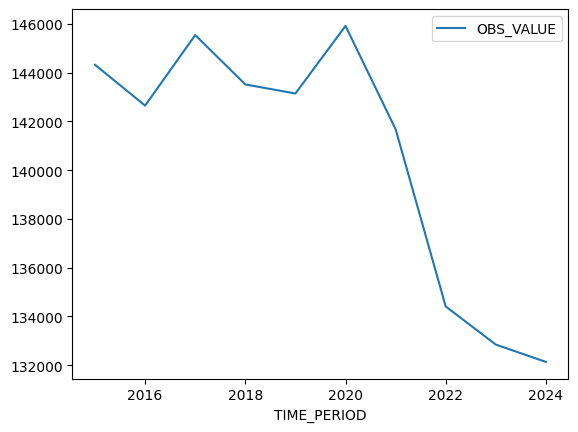

In [280]:
pigs_herd_df_a3100[pigs_herd_df_a3100['geo'] == 'EU27_2020'].plot('TIME_PERIOD', 'OBS_VALUE')
pigs_herd_df_a3100 = pigs_herd_df_a3100.rename(columns={'Geopolitical entity (reporting)': 'country'})

In [281]:
# Go by country, plot total cases of ADF against herd sizes:
# 1. aggregate by year on the total cases
# 2. merge the herd size 

In [285]:
pigs_herd_df_a3100['year_string'] = pigs_herd_df_a3100['TIME_PERIOD'].astype(str) + '-12'
# Step 2: Convert the date string column to a Period[M] column
pigs_herd_df_a3100['year_month'] = pd.to_datetime(pigs_herd_df_a3100['year_string']).dt.to_period('M')
pigs_herd_df_a3100 = pigs_herd_df_a3100.drop(columns=['year_string'])
pigs_herd_df_a3100['country'].value_counts()

country
Albania                                      10
Austria                                      10
Belgium                                      10
Bulgaria                                     10
Switzerland                                  10
Cyprus                                       10
Germany                                      10
Czechia                                      10
Denmark                                      10
Estonia                                      10
Romania                                      10
Greece                                       10
Spain                                        10
European Union - 27 countries (from 2020)    10
Hungary                                      10
Croatia                                      10
France                                       10
Finland                                      10
Ireland                                      10
Italy                                        10
Lithuania                       

In [283]:
df_europe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52095 entries, 0 to 61568
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   id_event           52095 non-null  int64              
 1   disease            52095 non-null  object             
 2   serotype           0 non-null      float64            
 3   latitude           52095 non-null  float64            
 4   longitude          52095 non-null  float64            
 5   locality           52095 non-null  object             
 6   country            52095 non-null  object             
 7   region             52095 non-null  object             
 8   observation_date   51699 non-null  datetime64[ns, UTC]
 9   report_date        52095 non-null  datetime64[ns, UTC]
 10  species            52095 non-null  object             
 11  diagnosis_source   52095 non-null  object             
 12  humans_affected    0 non-null      float64         

Two lines chart with two y-axes saved as two_lines_chart_twinx.png


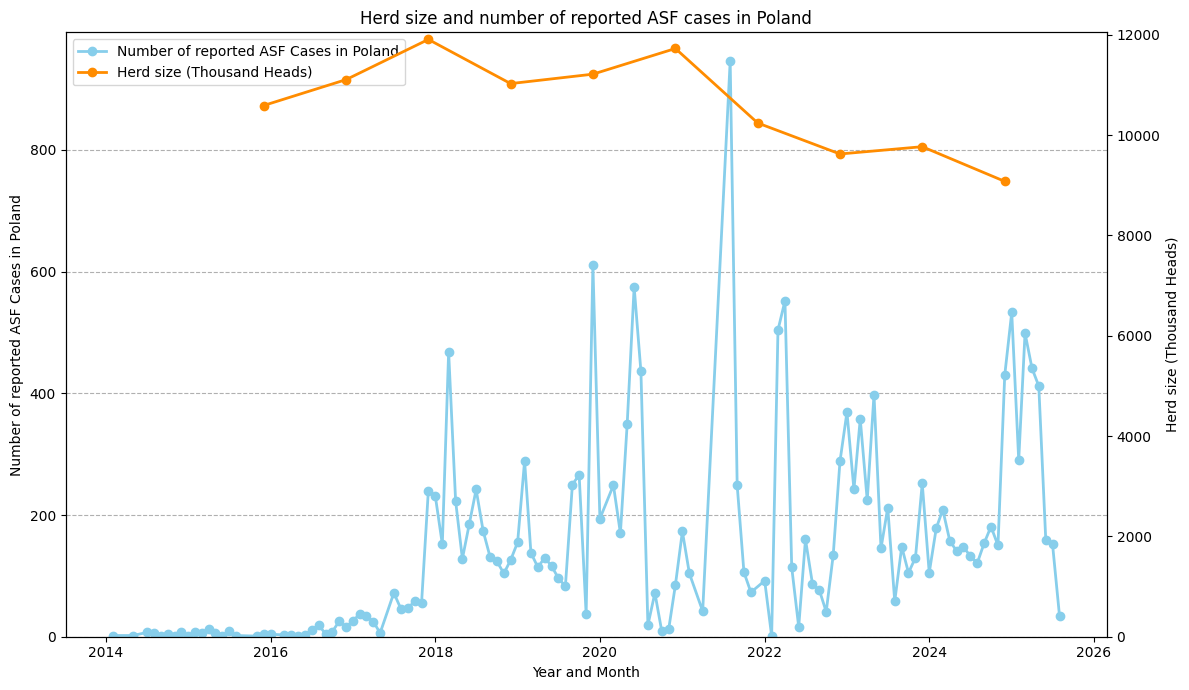

In [354]:
country_name = 'Poland'

df_cases = df_europe[df_europe['country'] == country_name]
df_herds = pigs_herd_df_a3100[pigs_herd_df_a3100['country'] == country_name]

# 1. Prepare df_cases for the line chart
cases_by_month = df_cases['report_year_month'].value_counts().sort_index()
cases_by_month.index = cases_by_month.index.to_timestamp()

# 2. Prepare df_herds for the line chart
herds_by_month = df_herds.set_index('year_month')
herds_by_month.index = herds_by_month.index.to_timestamp()


# 3. Create the plot with two lines and two y-axes
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot the cases data on the primary axes (ax1)
ax1.plot(
    cases_by_month.index,
    cases_by_month.values,
    label='Number of reported ASF Cases in Poland',
    color='skyblue',
    marker='o',
    linewidth=2
)
ax1.set_xlabel('Year and Month')
ax1.set_ylabel('Number of reported ASF Cases in Poland')
ax1.set_ylim(bottom=0)
ax1.grid(True, linestyle='--', axis='y')

# Create a secondary axes (ax2) that shares the same x-axis
ax2 = ax1.twinx()

# Plot the herds data on the secondary axes (ax2)
ax2.plot(
    herds_by_month.index,
    herds_by_month['OBS_VALUE'],
    label='Herd size (Thousand Heads)',
    color='darkorange',
    marker='o',
    linewidth=2
)
ax2.set_ylabel('Herd size (Thousand Heads)')
ax2.set_ylim(bottom=0)

# Set the title and combine the legends
ax1.set_title('Herd size and number of reported ASF cases in Poland')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.savefig('herd_size_vs_asf_cases_in_poland.svg')
print("Two lines chart with two y-axes saved as two_lines_chart_twinx.png")

# Maybe need to look at cases relative to the change in the number of cases? Deritive of the cases?
# Calculate correlation between them and then be done with it